In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib torch torchvision


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-_um9khov
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-_um9khov
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

In [5]:
image_path = "/content/drive/MyDrive/dog.jpg"
image_bgr = cv2.imread(image_path)
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Load SAM
checkpoint_path = "/content/drive/MyDrive/sam_vit_b_01ec64.pth"  # rename if needed
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device)
predictor = SamPredictor(sam)
predictor.set_image(image)

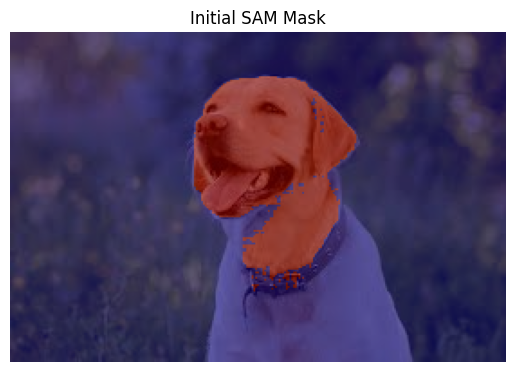

In [6]:
# FIRST CLICK
first_x, first_y = 128, 44

input_point = np.array([[first_x, first_y]])
input_label = np.array([1])
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)
sam_mask = masks[0].astype(np.uint8)

# Show SAM Mask
plt.imshow(image)
plt.imshow(sam_mask, alpha=0.6, cmap='jet')
plt.title("Initial SAM Mask")
plt.axis('off')
plt.show()


In [9]:
!git clone https://github.com/saic-vul/ritm_interactive_segmentation.git


Cloning into 'ritm_interactive_segmentation'...
fatal: could not read Username for 'https://github.com': No such device or address


In [11]:
!pip install opencv-python matplotlib scikit-image PyYAML torch

In [14]:
!pip install isegm

ERROR: Could not find a version that satisfies the requirement isegm (from versions: none)
ERROR: No matching distribution found for isegm


In [12]:
import sys
sys.path.append('./ritm_interactive_segmentation')
from isegm.inference import utils
from isegm.inference.clicker import Click
from isegm.inference.predictors import get_predictor
from isegm.model.model_zoo import get_model

ModuleNotFoundError: No module named 'isegm'